In [286]:
import os
import shutil # for moving files to folders
import json
import matplotlib.pyplot as plt

### Return and Save a Sorted Dictionary of File Distribution by Type:

{ 
    "txt": 2,
    "py": 1,
    "ipynb": 1
}

In [104]:
def distribution(path):
   
    files=os.listdir(path)
    ls=[i.split('.')[1] for i in files]
    ls.sort(reverse=True)
    
    dic={}
    for i in ls:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
    with open('file_distribution.json', 'w') as f:
         json.dump(dic, f, indent=4)
    
    

In [118]:
path="Desktop\proj_1"


In [167]:
distribution(path)  

### 2. Return a Sorted Dictionary of File Sizes and Their Locations:

{
    '1.35 GB': ['example_folder/file7.mp4'],
    '1.34 GB': ['example_folder/file6.mp4'],
    '5.25 MB': ['example_folder/file5.pdf'],
    '5.01 MB': ['example_folder/file4.py'],
    '3.46 MB': ['example_folder/file3.jpg'],
    '3.45 MB': ['example_folder/file2.jpg'],
    '2.13 MB': ['example_folder/file1.txt']
}

In [173]:
def size_location(path):
    files=os.listdir(path)
    dic={}
    for i in range(len(files)):
        loc=os.path.join(path, files[i]) #path+"\\"+files[i]  get file location
        file_stats = os.stat(loc)
        dic[str(file_stats.st_size/(1024*1024))+' MB']=loc
    sorted_dict = dict(sorted(dic.items()))
    
    with open('file_sizes.json', 'w') as f:
        json.dump(sorted_dict, f, indent=4)
        
        

In [174]:
size_location(path)

### Challenge

Not only save the dictionary which stores the file sizes but also create a bar plot which displays 10 heavyset files and their sizes.

In [245]:
def size_plot(path,n):
    files=os.listdir(path)
    dic={}
    for i ,file in enumerate(files):
        loc=os.path.join(path, files[i]) #path+"\\"+files[i] 
        file_stats = os.stat(loc)
        dic[file_stats.st_size]=file
    sorted_dict = dict(sorted(dic.items(), key=lambda item: item[0], reverse=True))
    
    plt.bar(list(sorted_dict.values())[:n],list(sorted_dict.keys())[:n])
    plt.show()

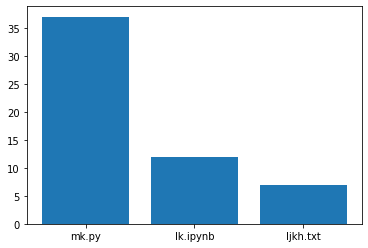

In [246]:
size_plot(path,3)


### 3. (Extra) Organize Files by Type

- Create subfolders in the given folder for each file type (e.g., `TextFiles`, `Images`, `Scripts`).
- Move files into their respective subfolders based on their extensions.

/example_folder
    /TextFiles
        file1.txt
    /Images
        file2.jpg
        file3.jpg
    /Scripts
        file4.py
    /Documents
        file5.pdf
    /Videos
        file6.mp4
        file7.mp4

In [234]:
path="Desktop\proj_1"

In [297]:
def Organize_Files(path):
    files=os.listdir(path)
    
    nested_directory=["Desktop\proj_1\TextFiles","Desktop\proj_1\Images",\
                  "Desktop\proj_1\Scripts",\
                  "Desktop\proj_1\Documents", "Desktop\proj_1\Videos"]
    extantions=['txt','jpg',['py','ipynb'],'pdf','mp4']
    
    for directory in nested_directory: # making folders
        os.makedirs(directory)
    
    for f in files:
        path_f=os.path.join(path, f)  # output example 'Desktop\\proj_1\\ljkh.txt'
        if os.path.isfile(path_f):    # if f is file
            ext=f.split('.')[1]
            if ext=='txt':
                destination=nested_directory[0]
            elif ext=='jpg':
                destination=nested_directory[1]
            elif ext=='py' or ext=='ipynb' :
                destination=nested_directory[2]
            elif ext=='pdf' :
                destination=nested_directory[3]
            elif ext=='mp4' :
                destination=nested_directory[4]
            src_path = os.path.join(path, f)
            dst_path = os.path.join(destination, f)
            shutil.move(src_path, dst_path)
        

In [298]:
Organize_Files(path)